<a href="https://colab.research.google.com/github/WagnerLopesCardozo/Analise_de_Algoritmos_e_Estrutura_de_Dados/blob/main/Wagner_LopesCardozo_Aula5Pratico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

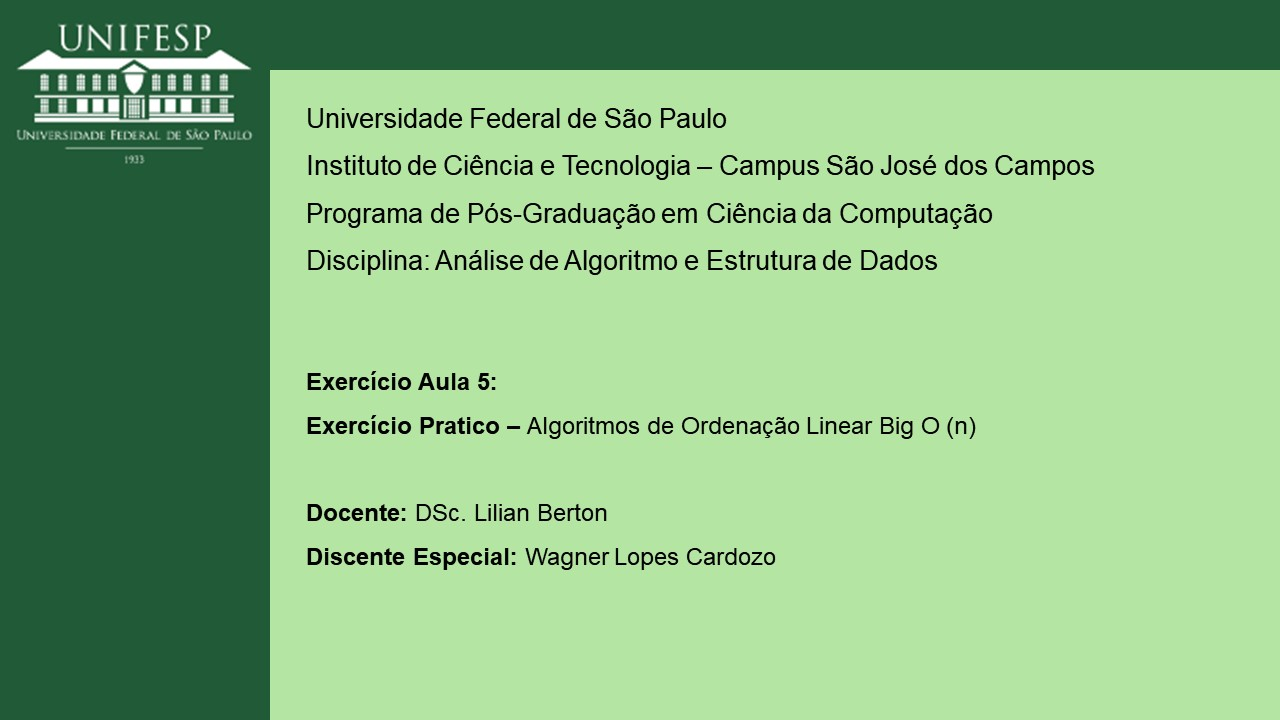

#Este algoritmo gera um vetor aleatório contendo 1000 datas (dia/mês/ano), sendo que dia contém valores de 1 a 31; mês de 1 a 12; e ano de 2000 a 2024.

* Ordena as datas usando radix sort combinado com dois métodos (contagem + um
método estável e contagem + um não estável).

* Calcula o tempo que o algoritmo levou em cada caso.

* Alguns comentários de possíveis não funcionamento correto.

#<font color=lightgreen>Algoritmo Radix Sort Contagem Estável:

##Explicação da Estabilidade no Código:

* Estabilidade do Counting Sort: O método estável de counting_sort mantém a ordem relativa dos elementos com chaves iguais. Isso é garantido pela maneira como o vetor de saída (output) é preenchido.

##Como a Estabilidade é Garantida:

* Contagem das Frequências: Primeiro, é calculada a frequência de cada valor e armazenada no array count.

* Construção do Array de Saída: Em seguida, o vetor de saída é preenchido a partir do final do vetor original (arr), garantindo que os elementos com a mesma chave sejam colocados em ordem relativa.

#Função Principal do Algoritmo:

In [ ]:
def counting_sort(arr, exp, get_value_func, max_val):
    n = len(arr)                                          # Obtém o número de elementos no array
    output = [0] * n                                      # Inicializa o array de saída com zeros
    count = [0] * (max_val + 1)                           # Inicializa o array de contagem com zeros. O tamanho é max_val + 1 para cobrir todos os possíveis valores

    # Conta a frequência de cada valor
    for i in range(n):                                    # Conta a frequência de cada valor baseado na posição dada pela função get_value_func
        index = get_value_func(arr[i], exp)               # Obtém o valor do dígito atual (determinado por exp) do elemento arr[i]
        count[index] += 1                                 # Incrementa a contagem do valor correspondente

    # Modifica count[i] para que ele contenha a posição final de cada elemento
    for i in range(1, max_val + 1):                       # Modifica o array count para que ele contenha a posição final de cada elemento no array de saída
        count[i] += count[i - 1]                          # Cada posição em count[i] é a soma das posições anteriores, que indica a posição final

    # Constroi o vetor de saída de forma estável
    for i in range(n - 1, -1, -1):                        #Constroi o vetor de saída (output) baseado na contagem
        index = get_value_func(arr[i], exp)               # Obtém o valor do dígito atual (determinado por exp) do elemento arr[i]
        output[count[index] - 1] = arr[i]                 # Coloca o elemento na posição correta no array de saída
        count[index] -= 1                                 # Decrementa a posição em count para garantir que o próximo elemento com o mesmo valor vá para a posição anterior

    # Copia os valores ordenados de volta para arr
    for i in range(n):                                    # Copia os valores ordenados de volta para o array original
        arr[i] = output[i]


#Comparação com o Método Não Estável:

* Método Não Estável: A diferença crucial é que um algoritmo de counting sort não estável não mantém a ordem original dos elementos com chaves iguais. No exemplo anterior, a cópia para o array output não é feita a partir do final para o início do array original, o que pode fazer com que a ordem original dos elementos com a mesma chave seja perdida.

#Implementação do algoritmo completo, com a exibição das 10 primeiras datas desordenadas, em seguida as 10 primeiras e as 10 últimas datas ordenadas e o tempo gasto para fazer a ordenação das 1000 datas.

In [ ]:
import random
import time

# Função de Counting Sort estável para o Radix Sort
def counting_sort(arr, exp, get_value_func, max_val):
    n = len(arr)
    output = [0] * n
    count = [0] * (max_val + 1)

    # Conta a frequência de cada valor
    for i in range(n):                             #O(n)
        index = get_value_func(arr[i], exp)
        count[index] += 1

    # Modifica count[i] para que ele contenha a posição final de cada elemento
    for i in range(1, max_val + 1):                                                #O(n)
        count[i] += count[i - 1]

    # Constroi o vetor de saída
    for i in range(n - 1, -1, -1):                         #O(n)
        index = get_value_func(arr[i], exp)
        output[count[index] - 1] = arr[i]
        count[index] -= 1

    # Copia os valores ordenados de volta para arr
    for i in range(n):                                     #O(n)
        arr[i] = output[i]                                            #Logo, O(n) + O(n) + O(n) = O(n) ***Complexidade assintótica linear***

# Função para aplicar o Radix Sort nas datas (ano, mês, dia)
def radix_sort_dates(arr):
    # Ordena pelos dias (1 a 31)
    counting_sort(arr, 'dia', lambda x, _: x['dia'], 31)
    # Ordena pelos meses (1 a 12)
    counting_sort(arr, 'mes', lambda x, _: x['mes'], 12)
    # Ordena pelos anos (2000 a 2024)
    counting_sort(arr, 'ano', lambda x, _: x['ano'], 2024)

# Função para gerar 1000 datas aleatórias
def generate_random_dates(n):
    dates = []
    for _ in range(n):
        day = random.randint(1, 31)
        month = random.randint(1, 12)
        year = random.randint(2000, 2024)
        dates.append({'dia': day, 'mes': month, 'ano': year})
    return dates

# Função para exibir as datas
def print_dates(dates):
    for date in dates:
        print(f"{date['dia']:02d}/{date['mes']:02d}/{date['ano']}")

# Gerando o vetor com 1000 datas aleatórias
dates = generate_random_dates(1000)

# Exibindo as primeiras 10 datas não ordenadas
print("Primeiras 10 datas antes da ordenação:")
print_dates(dates[:10])

# Calculando o tempo de execução do Radix Sort
start_time = time.time()
radix_sort_dates(dates)
end_time = time.time()

# Exibindo as primeiras 10 e últimas 10 datas ordenadas
print("\nPrimeiras 10 datas ordenadas:")
print_dates(dates[:10])

print("\nÚltimas 10 datas ordenadas:")
print_dates(dates[-10:])

# Exibindo o tempo gasto para ordenar
print(f"\nTempo gasto para ordenar o vetor: {end_time - start_time:.6f} segundos")


Primeiras 10 datas antes da ordenação:
22/04/2014
30/08/2014
05/05/2024
06/07/2010
09/08/2002
24/05/2009
11/01/2008
13/01/2012
28/06/2008
03/11/2021

Primeiras 10 datas ordenadas:
03/01/2000
14/01/2000
26/01/2000
28/01/2000
29/01/2000
16/02/2000
27/02/2000
27/02/2000
02/03/2000
21/03/2000

Últimas 10 datas ordenadas:
20/09/2024
21/09/2024
07/10/2024
09/10/2024
17/10/2024
23/10/2024
12/11/2024
19/11/2024
04/12/2024
15/12/2024

Tempo gasto para ordenar o vetor: 0.002805 segundos


#<font color=lightgreen>Algoritmo Radix Sort Contagem Não Estável:

##Características de um Counting Sort Não Estável

* Preenchimento do Array de Saída (output): Em um Counting Sort estável, os elementos com chaves iguais são colocados no array de saída (output) na ordem em que aparecem no array original. Isso é feito preenchendo o array de saída a partir do final para o início do array original.
Em um Counting Sort não estável, o array de saída é preenchido a partir do início para o fim, o que pode resultar em perda da ordem relativa dos elementos com a mesma chave.

#Função Principal do Algoritmo:

In [ ]:
# Função de Counting Sort não estável para o Radix Sort
def counting_sort(arr, exp, get_value_func, max_val):
    n = len(arr)                                              # Obtém o número de elementos no array
    output = [0] * n                                          # Inicializa o array de saída com zeros. O tamanho é igual ao número de elementos em arr
    count = [0] * (max_val + 1)                               # Inicializa o array de contagem com zeros. O tamanho é max_val + 1 para cobrir todos os valores possíveis

    # Conta a frequência de cada valor
    for i in range(n):                                        # Conta a frequência de cada valor baseado na posição dada pela função get_value_func
        index = get_value_func(arr[i], exp)                   # Obtém o valor do dígito atual (determinado por exp) do elemento arr[i]
        count[index] += 1                                     # Incrementa a contagem do valor correspondente

    # Modifica count[i] para que ele contenha a posição final de cada elemento
    for i in range(1, max_val + 1):                           # Modifica o array count para que ele contenha a posição final de cada elemento no array de saída
        count[i] += count[i - 1]                              # Cada posição em count[i] é a soma das posições anteriores, indicando a posição final

    # Constroi o vetor de saída sem a estabilidade
    for i in range(n):                                        # Constroi o vetor de saída (output) baseado na contagem, sem garantir a estabilidade
        index = get_value_func(arr[i], exp)                   # Obtém o valor do dígito atual (determinado por exp) do elemento arr[i]
        output[count[index] - 1] = arr[i]                     # Coloca o elemento na posição correta no array de saída
        count[index] -= 1                                     # Decrementa a posição em count para garantir que o próximo elemento com o mesmo valor vá para a posição anterior

    # Copia os valores ordenados de volta para arr
    for i in range(n):                                        # Copia os valores ordenados de volta para o array original
        arr[i] = output[i]


#Explicação do Método Não Estável no Código

##Construção do Vetor de Saída:

* A linha output[count[index] - 1] = arr[i] é onde o vetor de saída (output) é preenchido de acordo com a contagem. Esse preenchimento é feito do início para o fim, não garantindo a ordem original de elementos com chaves iguais, o que faz com que o algoritmo não seja estável.

##Contagem e Posições:

* O ajuste count[index] -= 1 é feito após o preenchimento do vetor de saída. Isso pode mover elementos com chaves iguais para posições diferentes daquelas em que estavam originalmente, resultando em uma ordenação não estável.

In [ ]:
import random
import time

# Função de Counting Sort não estável para o Radix Sort
def counting_sort(arr, exp, get_value_func, max_val):
    n = len(arr)
    output = [0] * n
    count = [0] * (max_val + 1)

    # Conta a frequência de cada valor
    for i in range(n):
        index = get_value_func(arr[i], exp)
        count[index] += 1

    # Modifica count[i] para que ele contenha a posição final de cada elemento
    for i in range(1, max_val + 1):
        count[i] += count[i - 1]

    # Constroi o vetor de saída sem a estabilidade
    for i in range(n):
        index = get_value_func(arr[i], exp)
        output[count[index] - 1] = arr[i]
        count[index] -= 1

    # Copia os valores ordenados de volta para arr
    for i in range(n):
        arr[i] = output[i]

# Função para aplicar o Radix Sort não estável nas datas (ano, mês, dia)
def radix_sort_dates(arr):
    # Ordena pelos dias (1 a 31)
    counting_sort(arr, 'dia', lambda x, _: x['dia'], 31)
    # Ordena pelos meses (1 a 12)
    counting_sort(arr, 'mes', lambda x, _: x['mes'], 12)
    # Ordena pelos anos (2000 a 2024)
    counting_sort(arr, 'ano', lambda x, _: x['ano'], 2024)

# Função para gerar 1000 datas aleatórias
def generate_random_dates(n):
    dates = []
    for _ in range(n):
        day = random.randint(1, 31)
        month = random.randint(1, 12)
        year = random.randint(2000, 2024)
        dates.append({'dia': day, 'mes': month, 'ano': year})
    return dates

# Função para exibir as datas
def print_dates(dates):
    for date in dates:
        print(f"{date['dia']:02d}/{date['mes']:02d}/{date['ano']}")

# Gerando o vetor com 1000 datas aleatórias
dates = generate_random_dates(1000)

# Exibindo as primeiras 10 datas não ordenadas
print("Primeiras 10 datas antes da ordenação:")
print_dates(dates[:10])

# Calculando o tempo de execução do Radix Sort não estável
start_time = time.time()
radix_sort_dates(dates)
end_time = time.time()

# Exibindo as primeiras 10 e últimas 10 datas ordenadas
print("\nPrimeiras 10 datas ordenadas:")
print_dates(dates[:10])

print("\nÚltimas 10 datas ordenadas:")
print_dates(dates[-10:])

# Exibindo o tempo gasto para ordenar
print(f"\nTempo gasto para ordenar o vetor: {end_time - start_time:.6f} segundos")


Primeiras 10 datas antes da ordenação:
27/08/2001
10/02/2018
05/06/2001
17/02/2023
09/06/2001
10/08/2015
11/12/2010
29/12/2013
19/12/2016
30/07/2014

Primeiras 10 datas ordenadas:
04/12/2000
04/12/2000
25/12/2000
29/12/2000
29/12/2000
31/10/2000
20/09/2000
24/09/2000
08/08/2000
09/08/2000

Últimas 10 datas ordenadas:
11/03/2024
21/03/2024
22/03/2024
24/03/2024
31/03/2024
12/02/2024
25/02/2024
06/01/2024
19/01/2024
27/01/2024

Tempo gasto para ordenar o vetor: 0.002295 segundos


#<font color=lightgreen>Análise e estudo da Ordenação Estável e Não Estável - Casos que podem Ocorrer Falhas:

#Ordenação Estável

1 - Limitações do Algoritmo Base:

* O método de Counting Sort estável pode não funcionar corretamente se o max_val for muito grande. Se o intervalo de valores possíveis for muito amplo em relação ao tamanho do array, o uso excessivo de memória pode levar a um desempenho ineficiente ou até falhas.

2 - Espaço de Memória:

* O algoritmo exige um array de contagem (count) e um array de saída (output). Se o número de valores possíveis for muito grande, pode haver problemas de memória.

3 - Dados Completamente Desordenados:

* Em cenários com dados totalmente desordenados e grandes quantidades, a estabilidade do Counting Sort não garante que os dados serão bem ordenados se houver muitos valores duplicados, mas isso é mais uma limitação de eficiência do que uma falha do algoritmo.

#Ordenação Não Estável

1 - Perda de Ordem Relativa:

* O principal problema com a ordenação não estável é a perda da ordem relativa dos elementos com a mesma chave de ordenação. Por exemplo, se você tiver dois elementos com o mesmo valor de dígito e um elemento deve aparecer antes do outro na ordem final, a ordenação não estável pode inverter essa ordem.

2 - Inconsistência na Ordenação:

* Dependendo da implementação específica do Counting Sort não estável, o algoritmo pode não preservar a ordem original de elementos com o mesmo valor de dígito. Isso pode levar a resultados inconsistentes em comparação com o que seria esperado com um algoritmo estável.

#Exemplos de Problemas:

##Para Ordenação Estável:

* Se você tiver uma lista de datas e usar Counting Sort estável para ordenar apenas os dias, pode haver problemas se dois elementos tiverem o mesmo dia, mas meses diferentes. O algoritmo estável garante que a ordem de datas com o mesmo dia será preservada. No entanto, se a implementação não for feita corretamente ou se houver problemas de memória, isso pode não ocorrer conforme o esperado.

##Para Ordenação Não Estável:

* Se você estiver usando Counting Sort não estável para ordenar uma lista de datas e os dias forem iguais, mas os meses e anos forem diferentes, a ordem original das datas com o mesmo dia pode ser perdida. Isso se torna um problema se você estiver tentando ordenar por múltiplos critérios, onde a estabilidade entre os critérios é crucial.

##Logo, podemos concluir que, ambos os métodos têm suas aplicações e limitações. A escolha entre ordenação estável e não estável depende dos requisitos do problema específico e do tipo de dados com os quais você está lidando. A ordenação estável é essencial quando a preservação da ordem relativa de elementos com chaves iguais é importante, enquanto a não estável pode ser adequada quando essa ordem não é relevante

#<font color=lightgreen>Anexo:

##Este algoritmo foi implementado com uma outra abordagem de escrever a função geradora de datas partindo de 1972 até 2024 usando método estável exibindo na tela as 20 primeiras desordenadas e em seguida as 20 primeiras ordenadas e 20 últimas ordenadas do vetor e o tempo de execução.

In [ ]:
import random
import time

# Função de Counting Sort estável para o Radix Sort
def counting_sort(arr, exp, get_value_func, max_val):
    n = len(arr)
    output = [0] * n
    count = [0] * (max_val + 1)

    # Conta a frequência de cada valor
    for i in range(n):  # O(n)
        index = get_value_func(arr[i], exp)
        count[index] += 1

    # Modifica count[i] para que ele contenha a posição final de cada elemento
    for i in range(1, max_val + 1):  # O(max_val)
        count[i] += count[i - 1]

    # Constroi o vetor de saída de forma estável
    for i in range(n - 1, -1, -1):  # O(n)
        index = get_value_func(arr[i], exp)
        output[count[index] - 1] = arr[i]
        count[index] -= 1

    # Copia os valores ordenados de volta para arr
    for i in range(n):  # O(n)
        arr[i] = output[i]  # O(n)

# Função para aplicar o Radix Sort nas datas (ano, mês, dia)
def radix_sort_dates(arr):
    # Ordena pelos dias (1 a 31)
    counting_sort(arr, 'dia', lambda x, _: x['dia'], 31)
    # Ordena pelos meses (1 a 12)
    counting_sort(arr, 'mes', lambda x, _: x['mes'], 12)
    # Ordena pelos anos (1972 a 2024)
    counting_sort(arr, 'ano', lambda x, _: x['ano'] - 1972, 2024 - 1972 + 1)

#************************************ OUTRA FORMA DE GERAR AS DATAS **** AGORA DE 1972 A 2024 *******************

# Função para gerar 10.000 datas aleatórias entre 1972 e 2024
def generate_random_dates(n):
    def get_days_in_month(month, year):
        #Retorna o número de dias em um mês específico de um ano específico
        if month in [1, 3, 5, 7, 8, 10, 12]:
            return 31
        elif month in [4, 6, 9, 11]:
            return 30
        elif month == 2:
            if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
                return 29
            else:
                return 28
        return 30

    dates = []
    for _ in range(n):
        year = random.randint(1972, 2024)
        month = random.randint(1, 12)
        day = random.randint(1, get_days_in_month(month, year))
        dates.append({'dia': day, 'mes': month, 'ano': year})
    return dates

#*******************************************************************************************

# Função para exibir as datas
def print_dates(dates):
    for date in dates:
        print(f"{date['dia']:02d}/{date['mes']:02d}/{date['ano']}")

# Gerando o vetor com 10.000 datas aleatórias
dates = generate_random_dates(10000)

# Exibindo as primeiras 20 datas não ordenadas
print("Primeiras 20 datas antes da ordenação:")
print_dates(dates[:20])

# Calculando o tempo de execução do Radix Sort
start_time = time.time()
radix_sort_dates(dates)
end_time = time.time()

# Exibindo as primeiras 20 e últimas 20 datas ordenadas
print("\nPrimeiras 20 datas ordenadas:")
print_dates(dates[:20])

print("\nÚltimas 20 datas ordenadas:")
print_dates(dates[-20:])

# Exibindo o tempo gasto para ordenar
print(f"\nTempo gasto para ordenar o vetor: {end_time - start_time:.6f} segundos")


Primeiras 20 datas antes da ordenação:
11/04/2000
30/06/1994
05/03/2015
12/09/1982
08/07/1981
16/02/2002
09/06/2005
16/05/2022
06/09/2011
31/12/1982
04/07/2011
06/06/1977
28/08/2020
27/11/2009
11/02/2021
20/08/2024
04/01/2024
06/07/1997
04/05/1984
11/09/1974

Primeiras 20 datas ordenadas:
04/01/1972
05/01/1972
09/01/1972
11/01/1972
14/01/1972
15/01/1972
15/01/1972
17/01/1972
18/01/1972
21/01/1972
23/01/1972
24/01/1972
24/01/1972
26/01/1972
28/01/1972
01/02/1972
15/02/1972
18/02/1972
19/02/1972
22/02/1972

Últimas 20 datas ordenadas:
25/11/2024
29/11/2024
30/11/2024
30/11/2024
30/11/2024
01/12/2024
05/12/2024
07/12/2024
10/12/2024
17/12/2024
18/12/2024
18/12/2024
18/12/2024
22/12/2024
23/12/2024
25/12/2024
25/12/2024
27/12/2024
29/12/2024
31/12/2024

Tempo gasto para ordenar o vetor: 0.034911 segundos


#<font color=lightgreen>Recursos Computacionais:

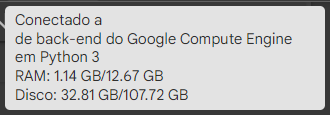

#<font color=lightgreen>Referências:

* Geeks For Geeks, Radix Sort – Data Structures and Algorithms Tutorials, https://www.geeksforgeeks.org/radix-sort/

* stackoverflow, radix sort using python function, https://stackoverflow.com/questions/26418728/radix-sort-using-python-function

* stackoverflow,Python Radix Sort, https://stackoverflow.com/questions/35419229/python-radix-sort

* stackoverflow, Pushing Radix Sort (and python) to its limits, https://stackoverflow.com/questions/20207791/pushing-radix-sort-and-python-to-its-limits

* stackoverflow, Radix Sort for Strings in Python, https://stackoverflow.com/questions/60968950/radix-sort-for-strings-in-python

* Geeks For Geeks, Counting Sort – Data Structures and Algorithms Tutorials, https://www.geeksforgeeks.org/counting-sort/

* Wikipedia, Counting sort, https://en.wikipedia.org/wiki/Counting_sort

* Wikipedia, Counting sort, https://pt.wikipedia.org/wiki/Counting_sort



